In [2]:
import os
import pandas as pd
from pandas import json_normalize
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Function to read data from text (CSV) files
def read_data(file_name):
    df = pd.read_csv(file_name, names=['data_id', 'accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension', 'timestamp'], dtype=str)
    df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
    df[['accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension']] = df[['accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension']].apply(pd.to_numeric, errors='coerce')
    df['tension'] = 0.650 * (df['tension'] - 2166)
    return df

def establish_printing_start(file_name):
    df = pd.read_json(file_name, lines=True)
    df = json_normalize(df.to_dict('records'))
    return df[df.status == 'P'].head(1)['timestamp'].values[0]

# Add Label Encoder
label_encoder = LabelEncoder()

def process_and_label_data(base_dir):
    categories = ['arm_failure', 'bowden', 'plastic', 'proper', 'retraction_05', 'unstick']
    all_data = []

    for category in categories:
        print(f"Processing category: {category}")
        txt_file = os.path.join(base_dir, category, 't.txt')
        json_file = os.path.join(base_dir, category, 'j.json')

        df = read_data(txt_file)
        start_time = establish_printing_start(json_file)
        df = df[df.time > start_time]
        
        # Add category label
        df['label'] = category

        all_data.append(df)

    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

def zscore_normalize_data(df, columns):
    for column in columns:
        df[column] = df[column].astype(float)
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df

# Function to plot raw data
def plot_raw_data(df, features, categories):
    for category in categories:
        category_data = df[df['label'] == category]
        category_data_interpolated = category_data.copy().interpolate(method='linear')
        for feature in features:
            plt.figure(figsize=(15, 5))

            # Plot raw and interpolated data together
            plt.plot(category_data['time'], category_data[feature], label='Raw Data', alpha=0.6)
            plt.plot(category_data_interpolated['time'], category_data_interpolated[feature], label='Interpolated Data', alpha=0.6)
            plt.title(f'Raw vs Interpolated Data for Category: {category}, Feature: {feature}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.legend()
            plt.show()


# Function to plot raw data
def plot_Normalized_data(df, features, categories):
    for category in categories:
        category_data = df[df['label'] == category]
        for feature in features:
            plt.figure(figsize=(15, 5))
            plt.plot(category_data['time'], category_data[feature])
            plt.title(f'Normalized Data for Category: {category}, Feature: {feature}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

In [4]:
# Call the function to process and label the data
base_directory = r'C:\MyFiles\AI\UNI\ML-DP-AI\Project\dataset\WithBase'
all_data = process_and_label_data(base_directory)

# Handle missing values using interpolation
all_data_int = all_data.interpolate(method='linear')

Raw_data = all_data_int.copy()

categories = ['arm_failure', 'bowden', 'plastic', 'proper', 'retraction_05', 'unstick']
features = ['accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension']

Processing category: arm_failure


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2208005594.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: bowden


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2208005594.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: plastic


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2208005594.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: proper


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2208005594.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: retraction_05


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2208005594.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: unstick


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2208005594.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_11092\2784722941.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_data_int = all_data.interpolate(method='linear')


In [5]:
def kalman_filter(data, process_variance=10.0, measurement_variance=10.0):
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([[data[0]]])  # initial state
    kf.F = np.array([[1]])  # state transition matrix
    kf.H = np.array([[1]])  # measurement function
    kf.P *= 1.0  # covariance matrix
    kf.R = measurement_variance  # measurement uncertainty
    kf.Q = process_variance  # process uncertainty

    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0, 0])

    return filtered_data

def apply_kalman_filter(df, columns):
    for column in columns:
        df[column] = kalman_filter(df[column].values)
    return df

In [6]:
#This cell takes too much time because of Kalman Filter

from filterpy.kalman import KalmanFilter
# Apply Kalman filter to the accelerometer data
all_data = apply_kalman_filter(all_data_int, features)
all_data_Filtered = all_data.copy()

In [7]:
all_data = zscore_normalize_data(all_data, features)

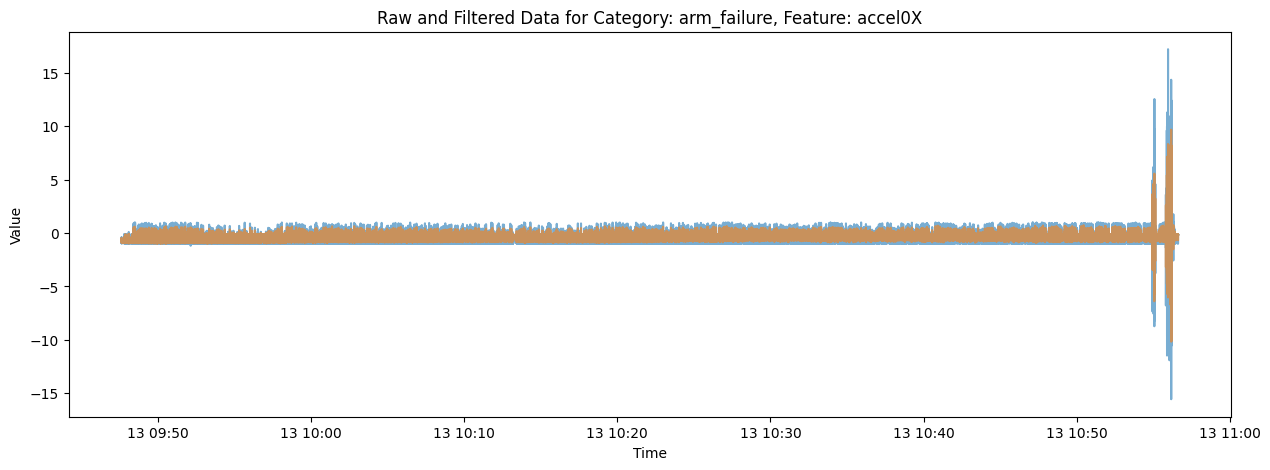

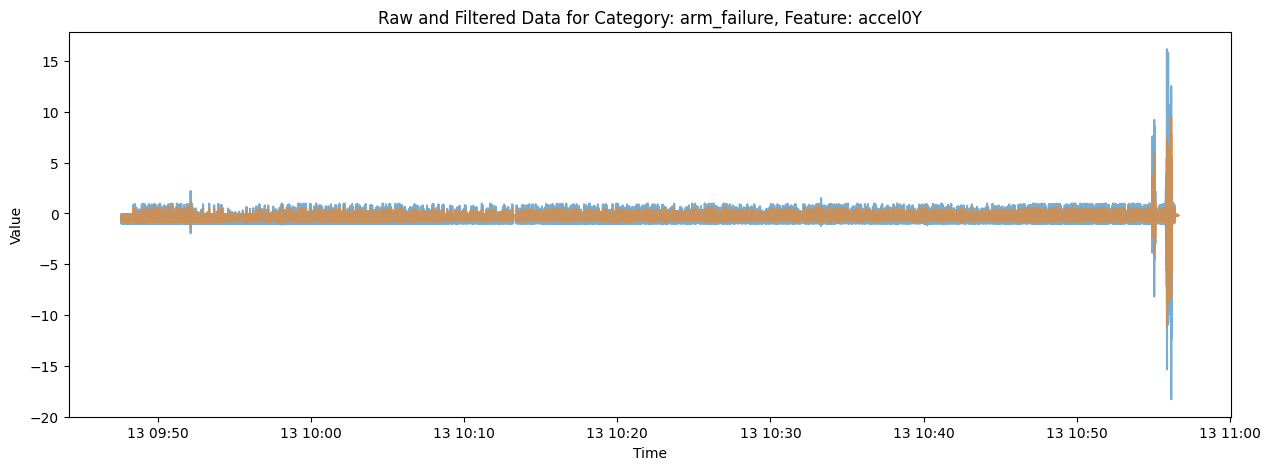

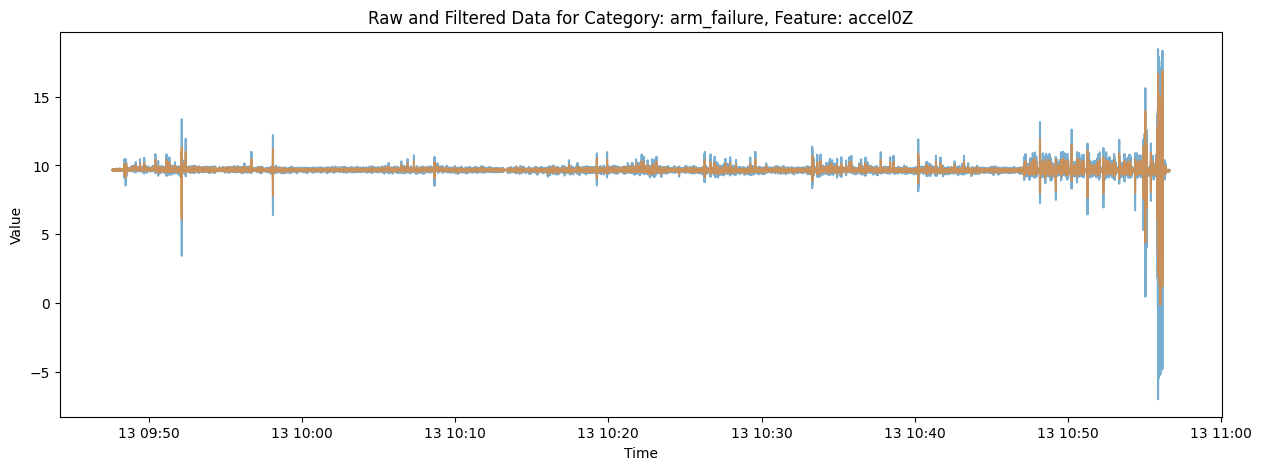

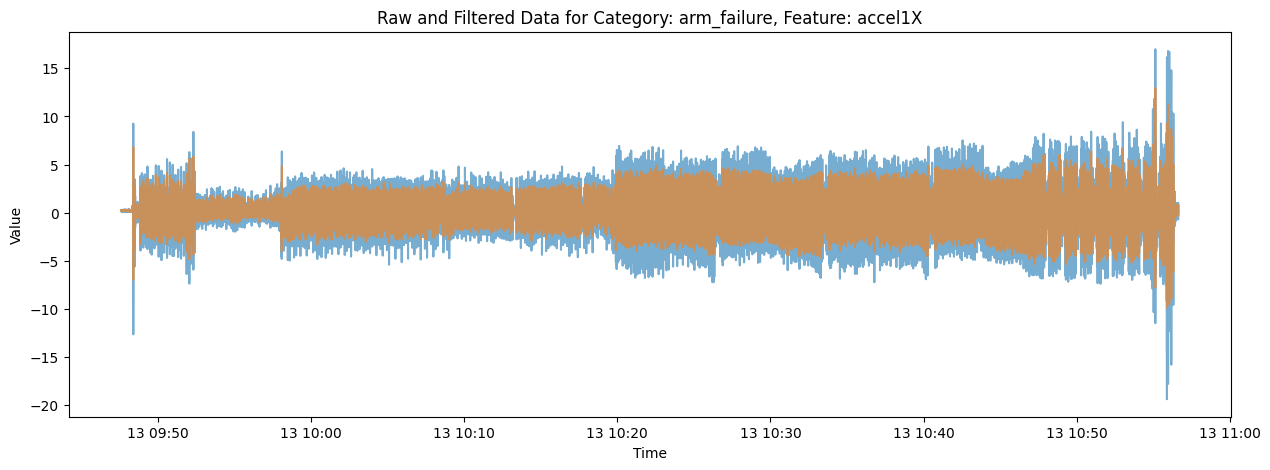

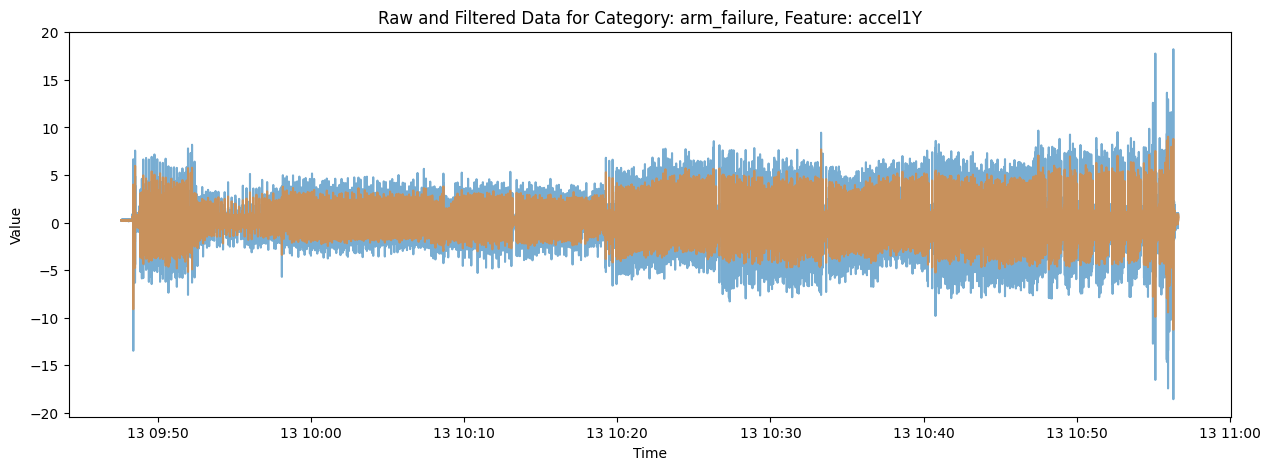

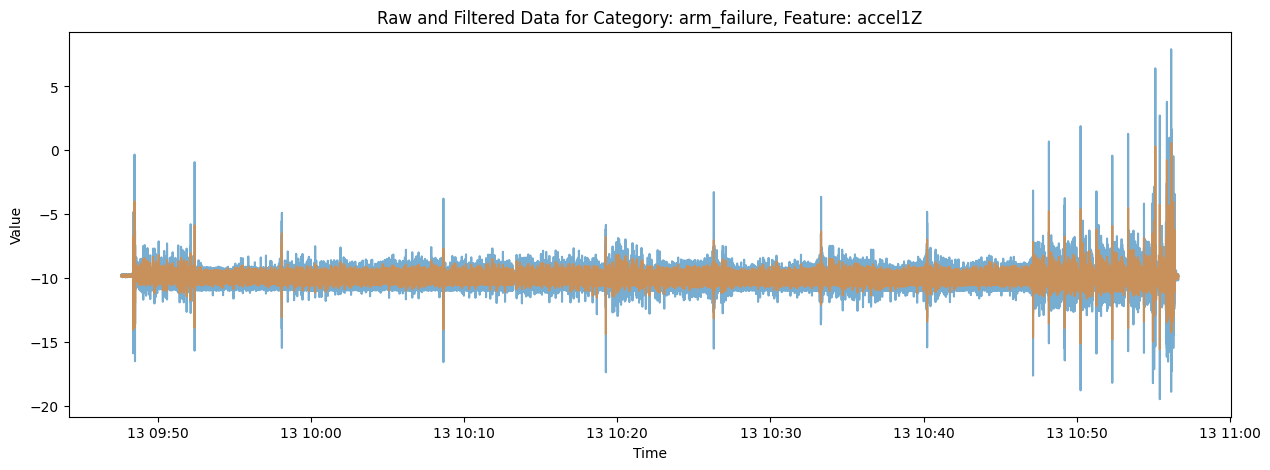

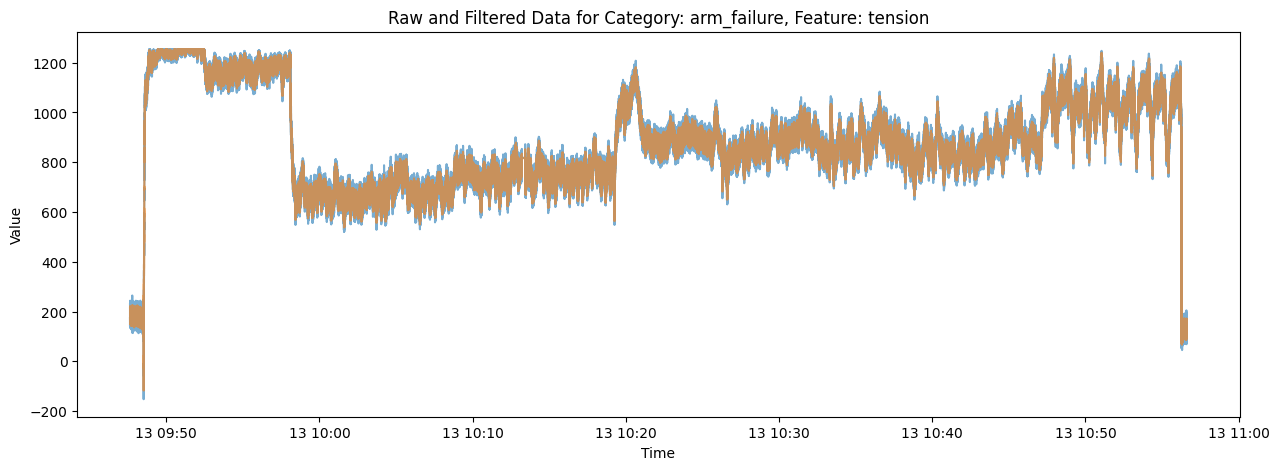

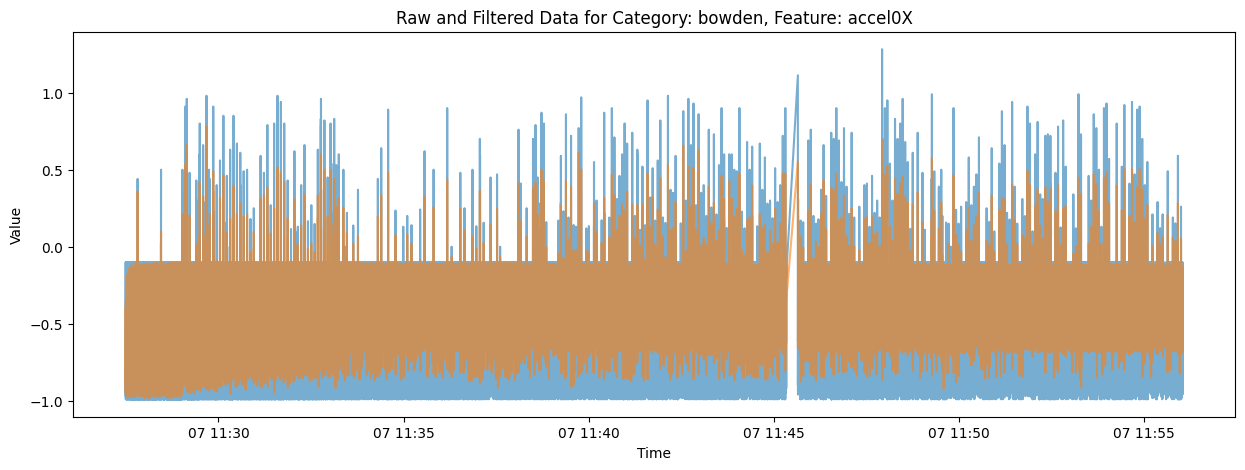

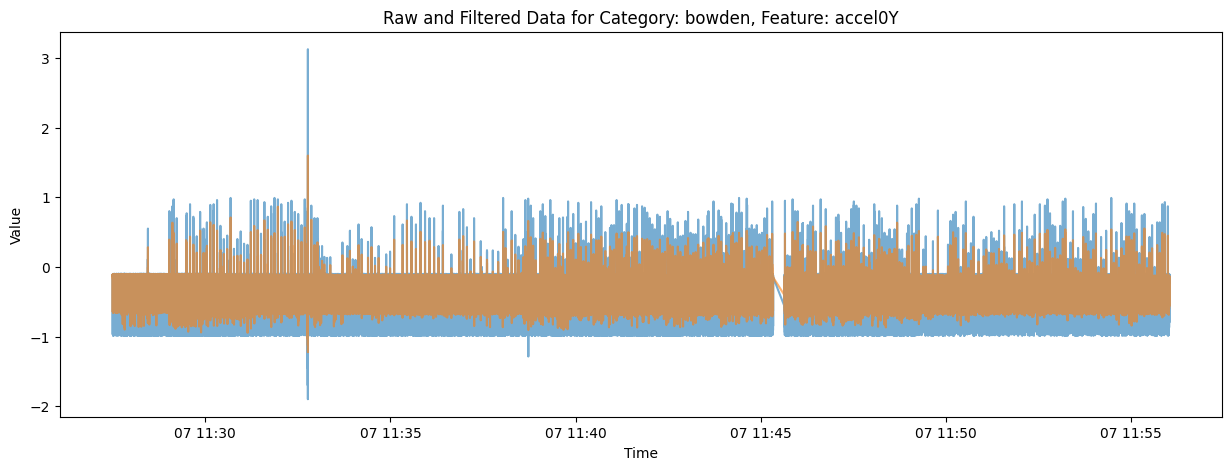

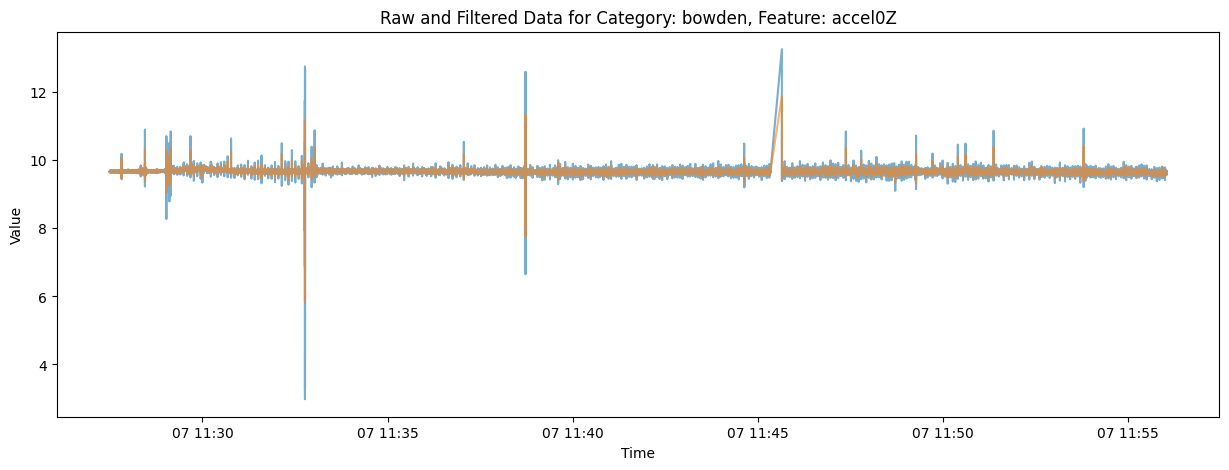

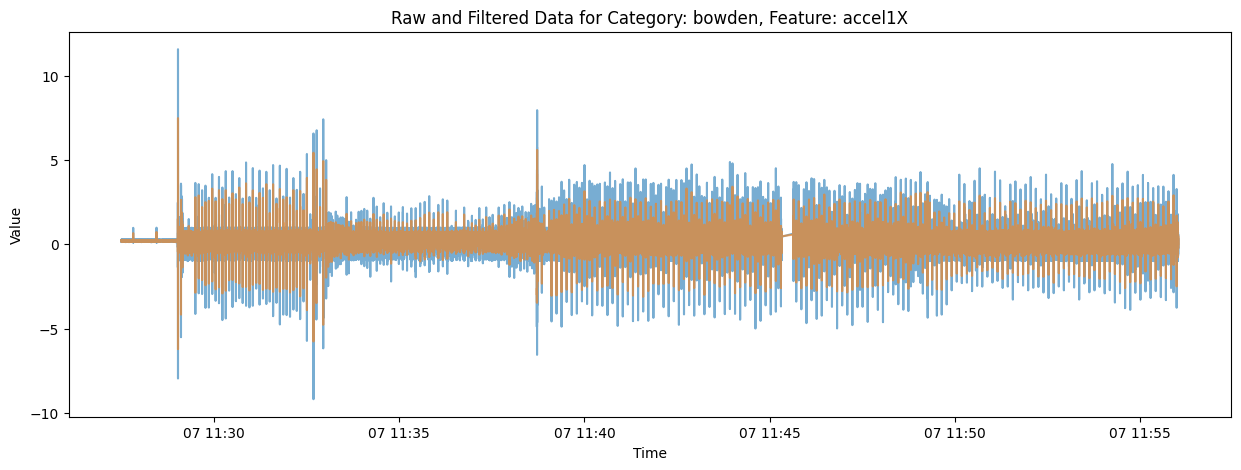

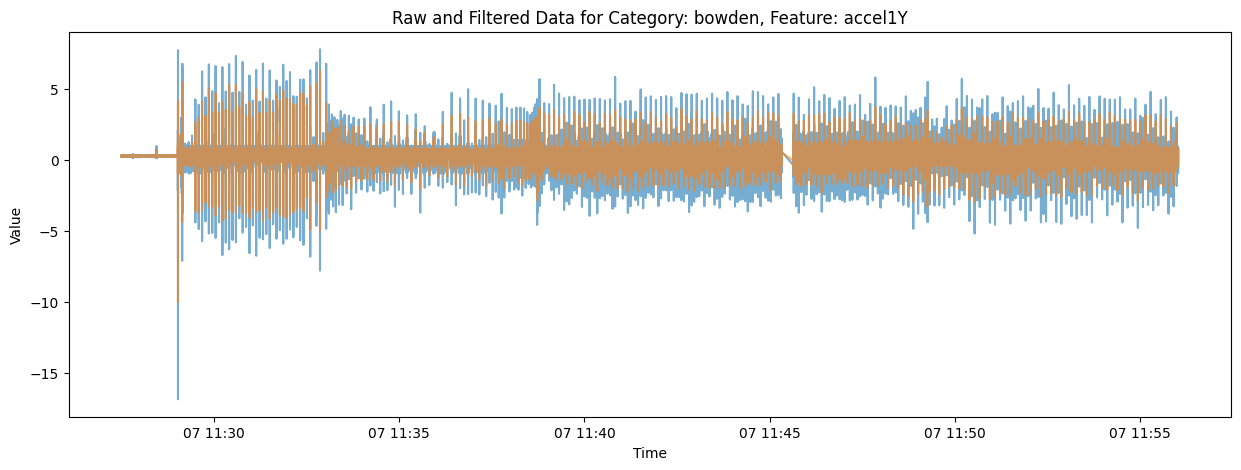

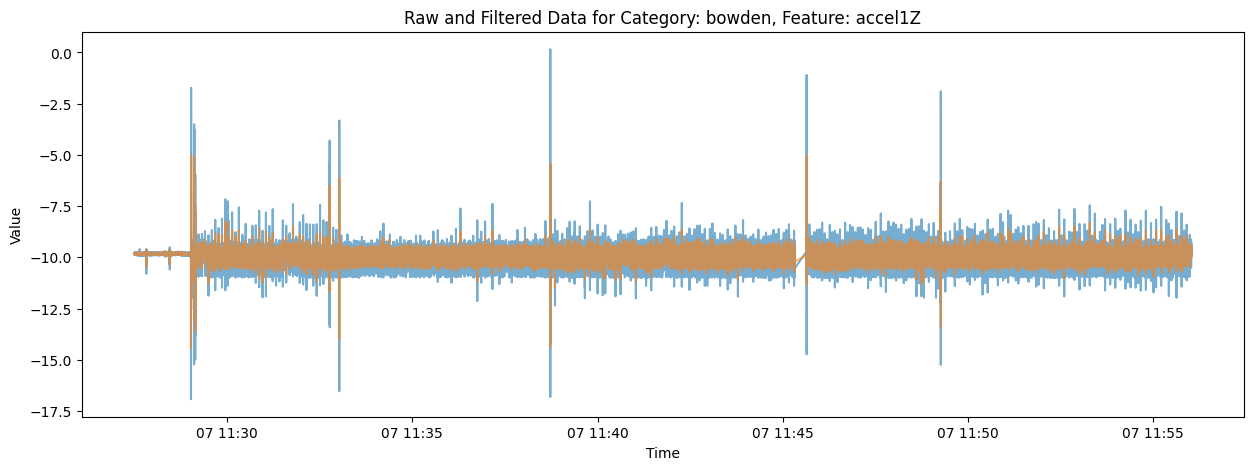

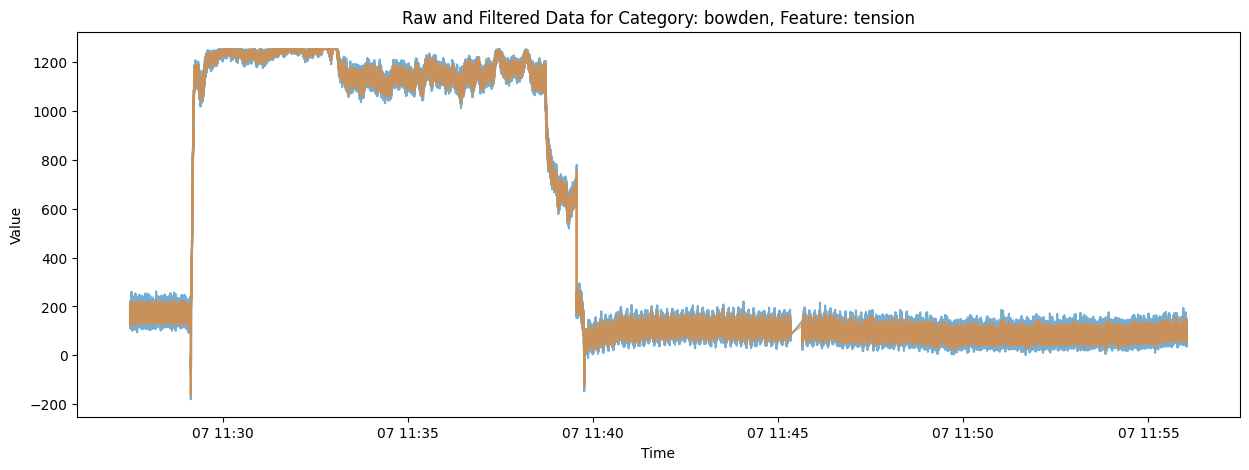

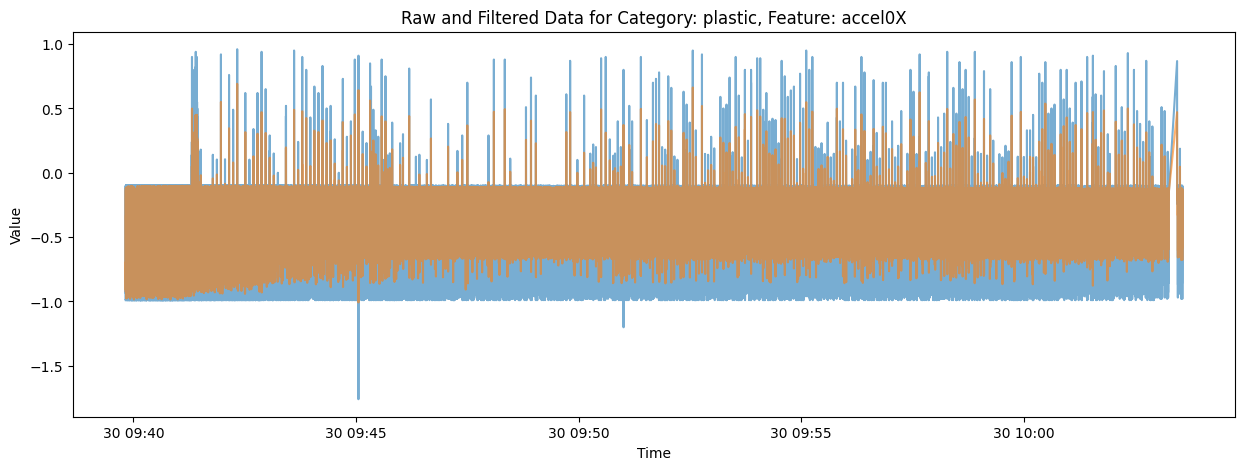

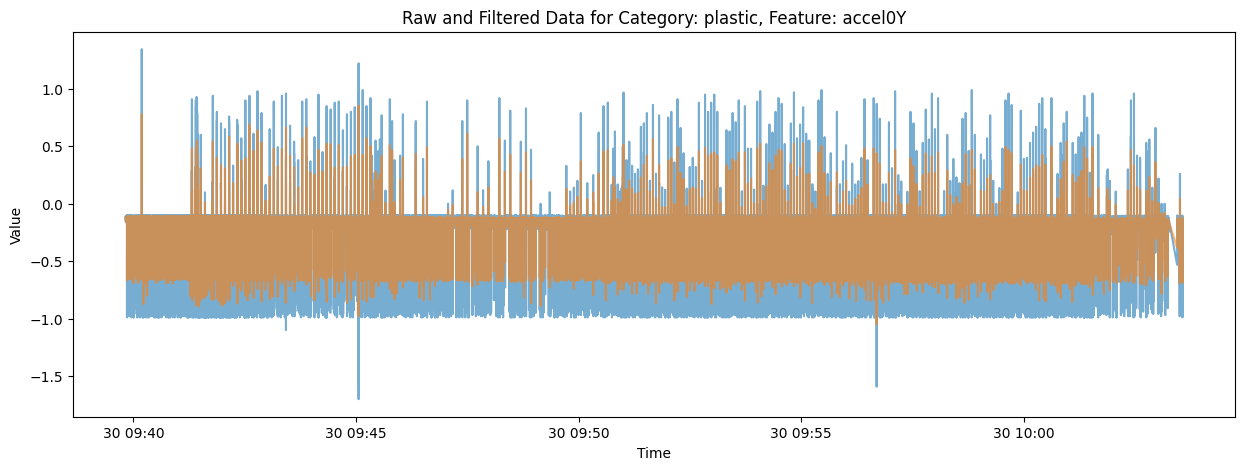

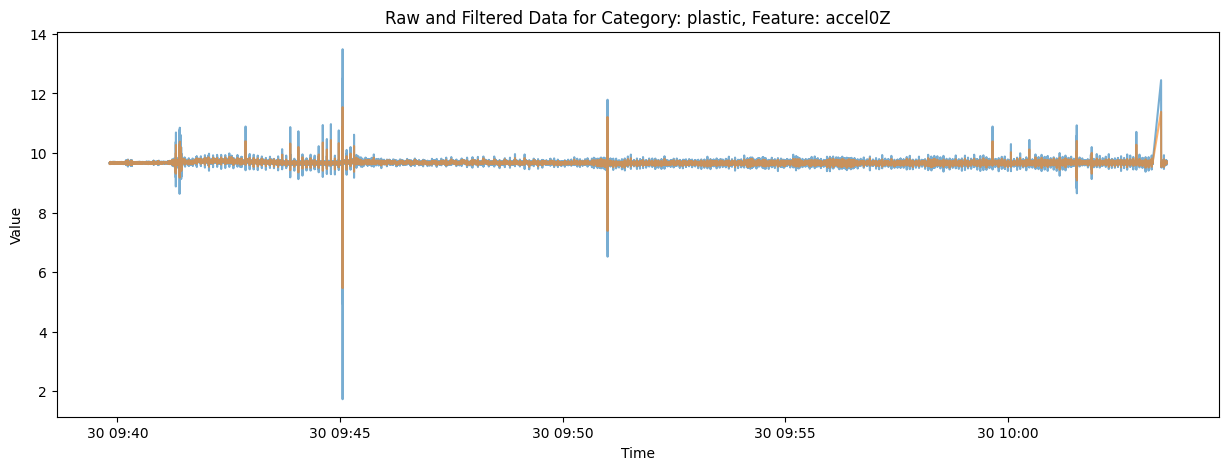

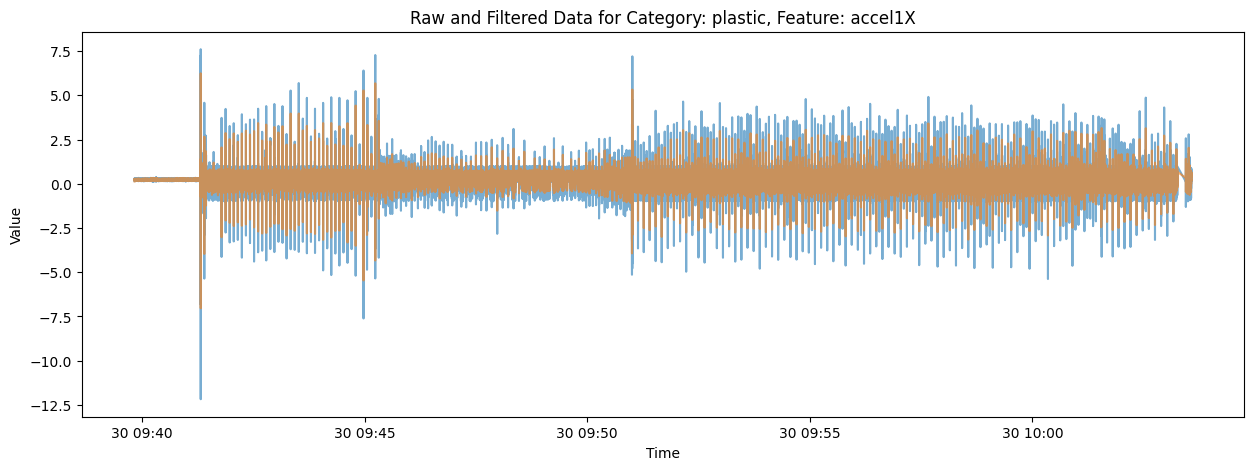

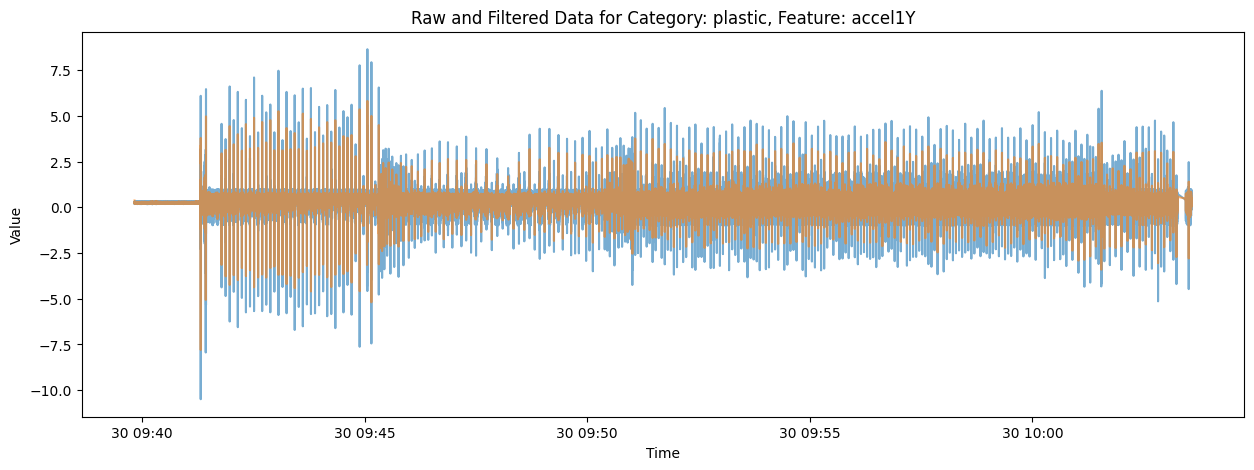

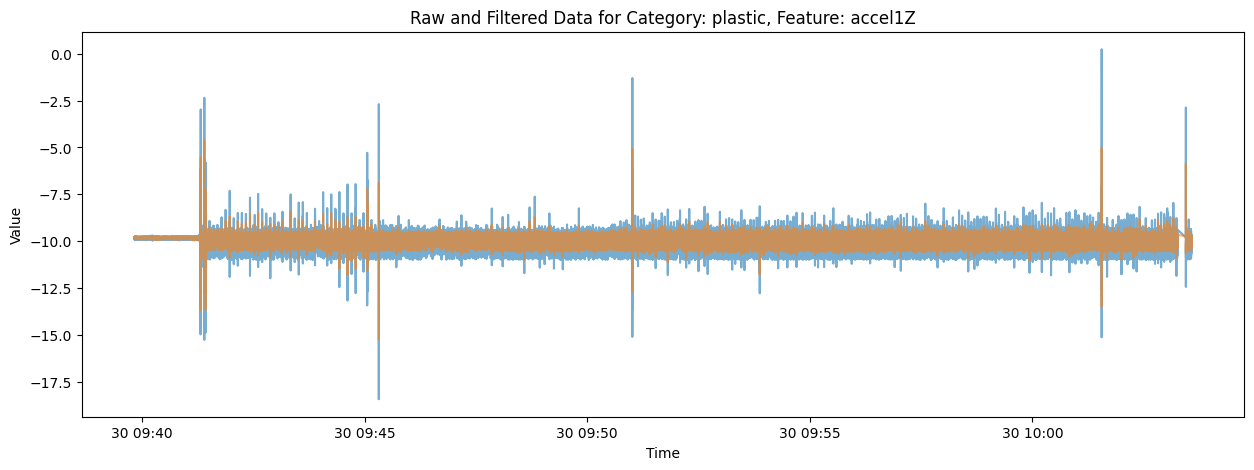

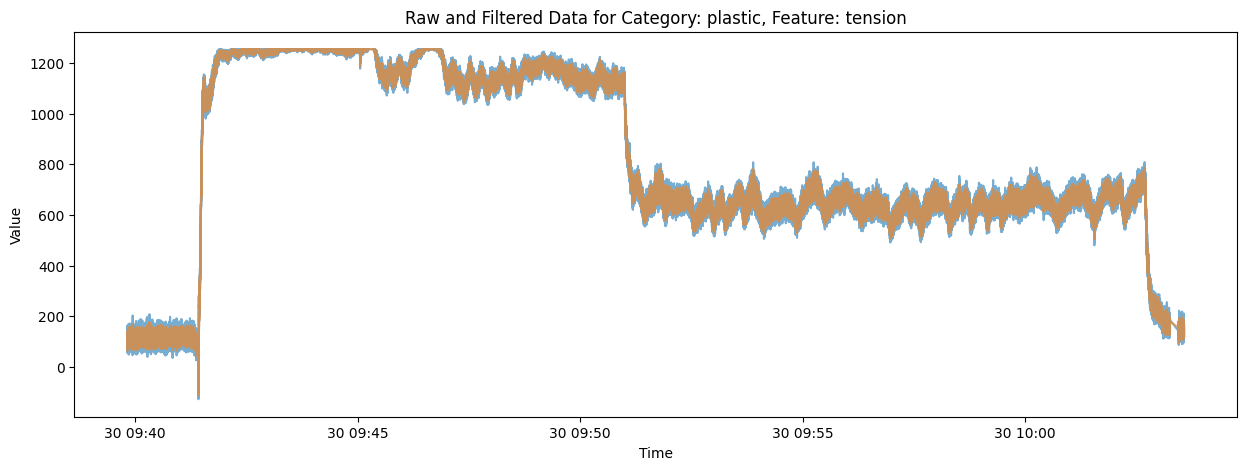

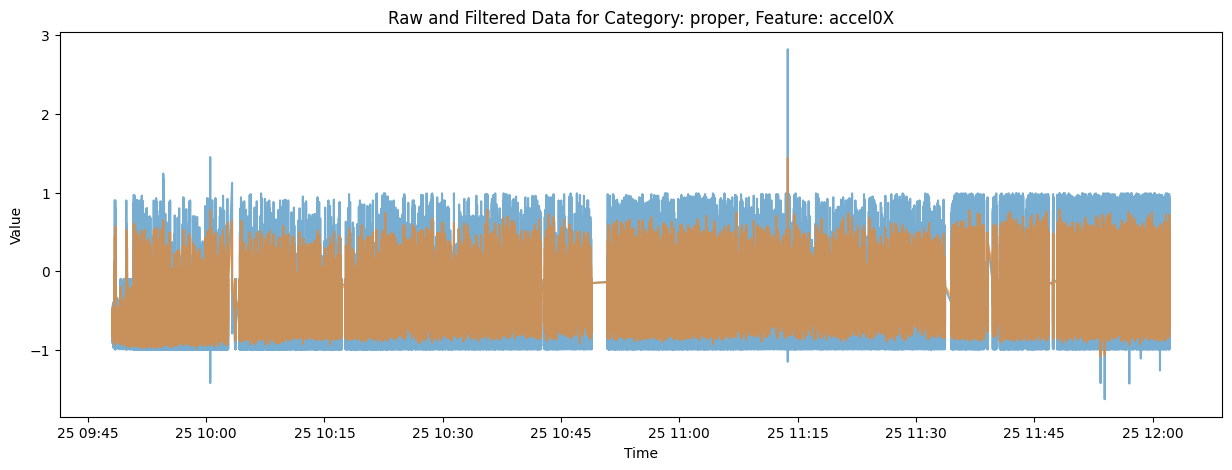

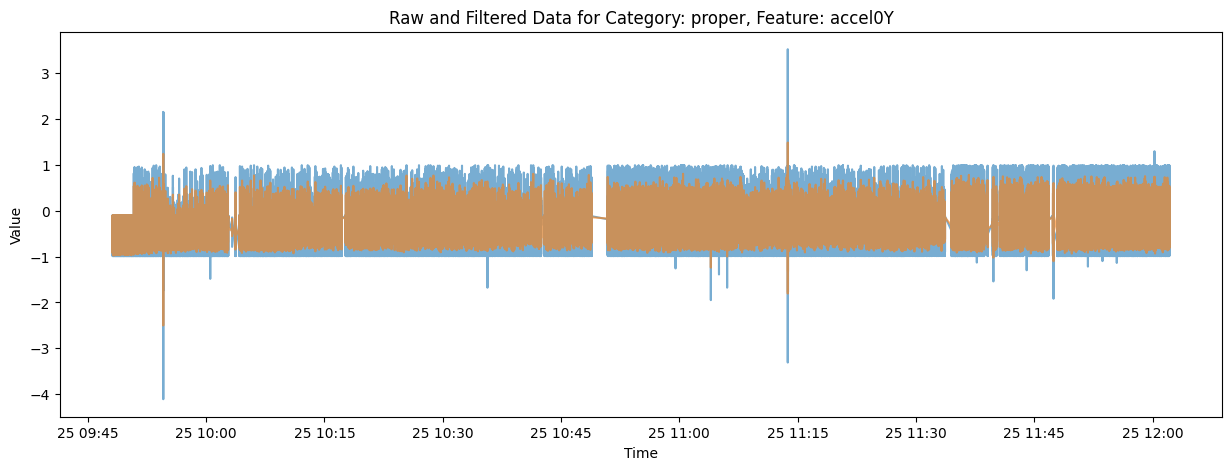

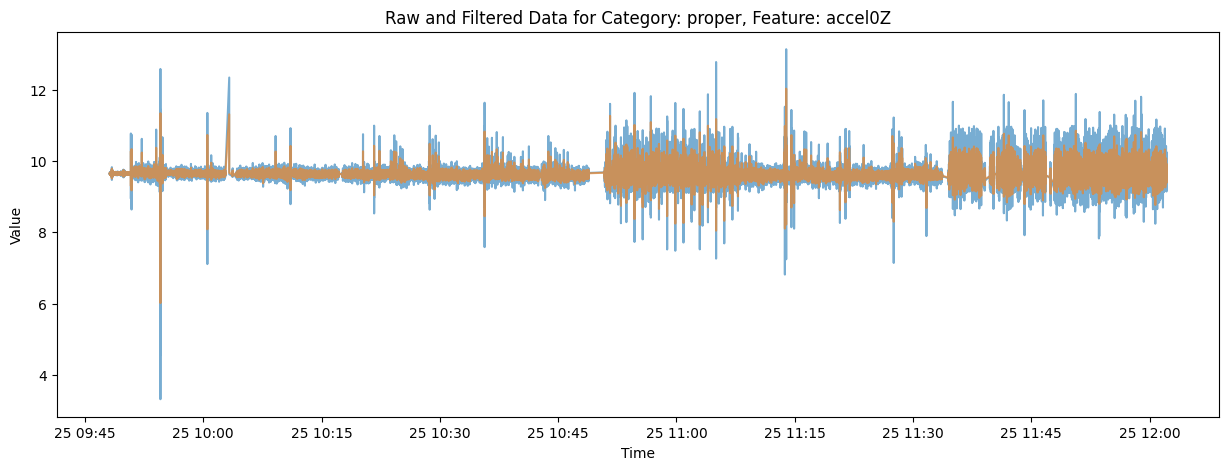

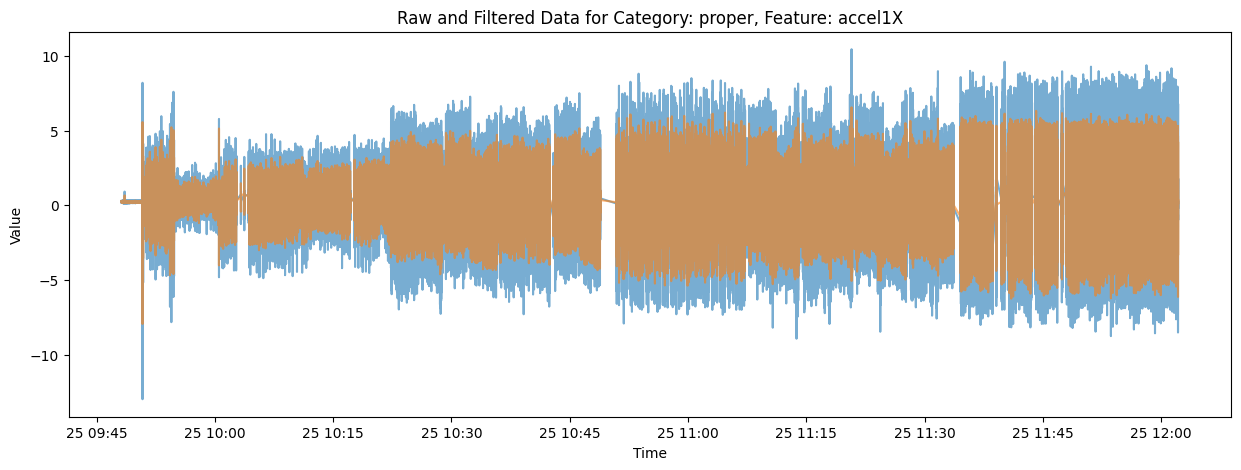

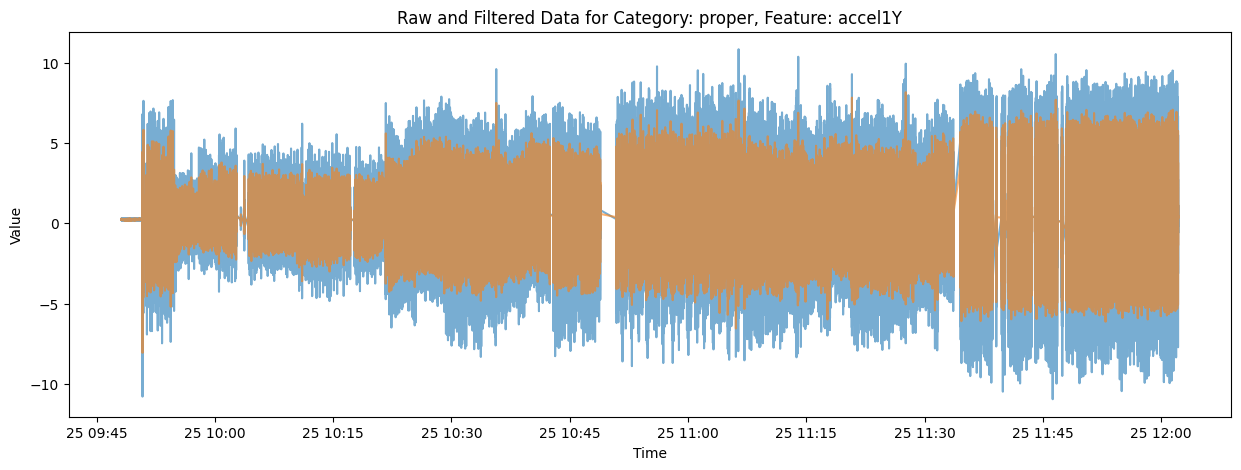

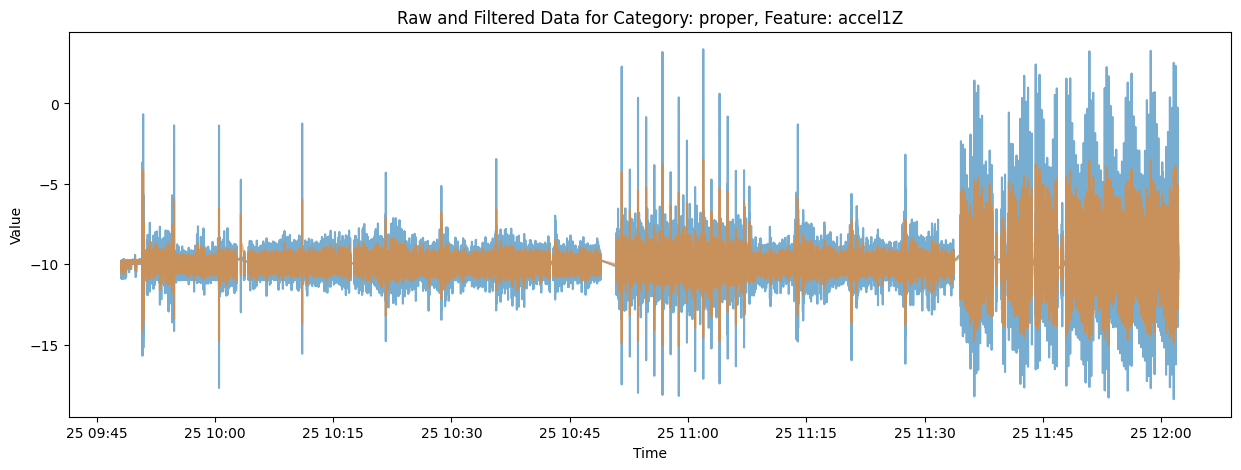

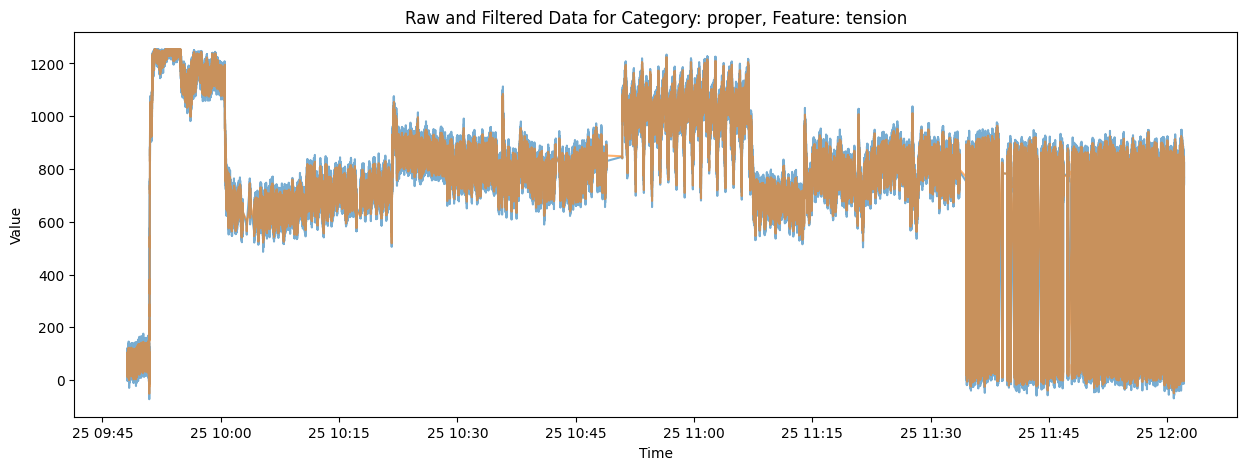

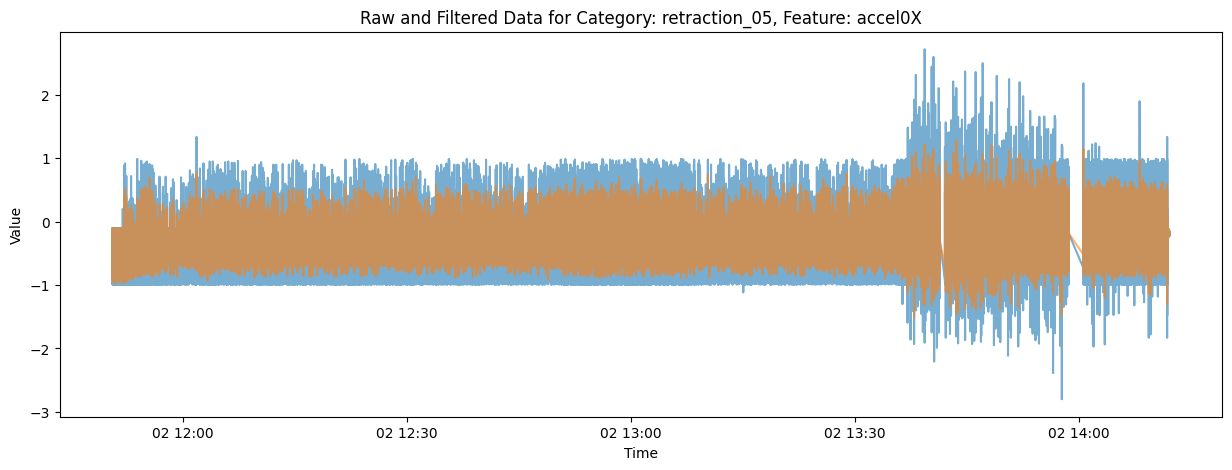

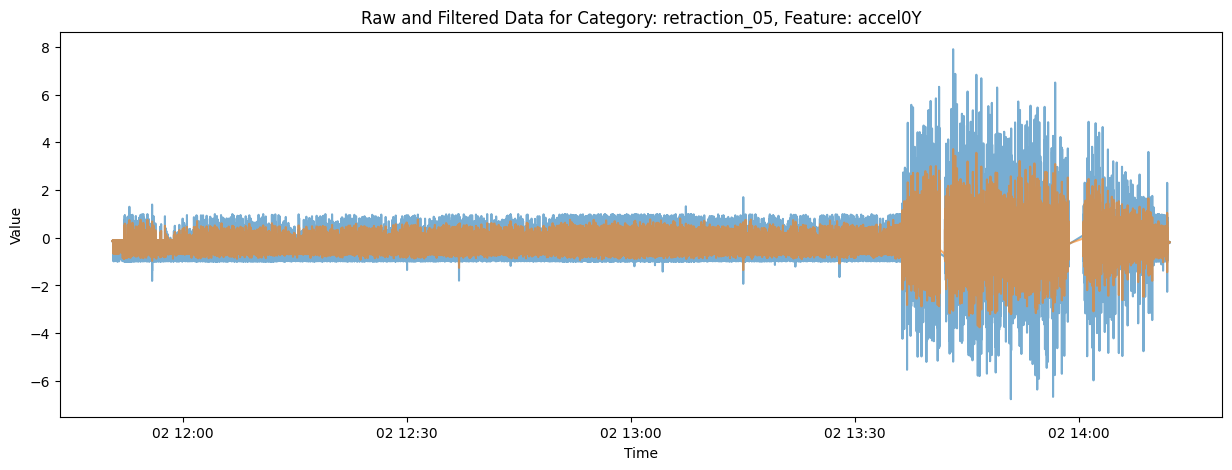

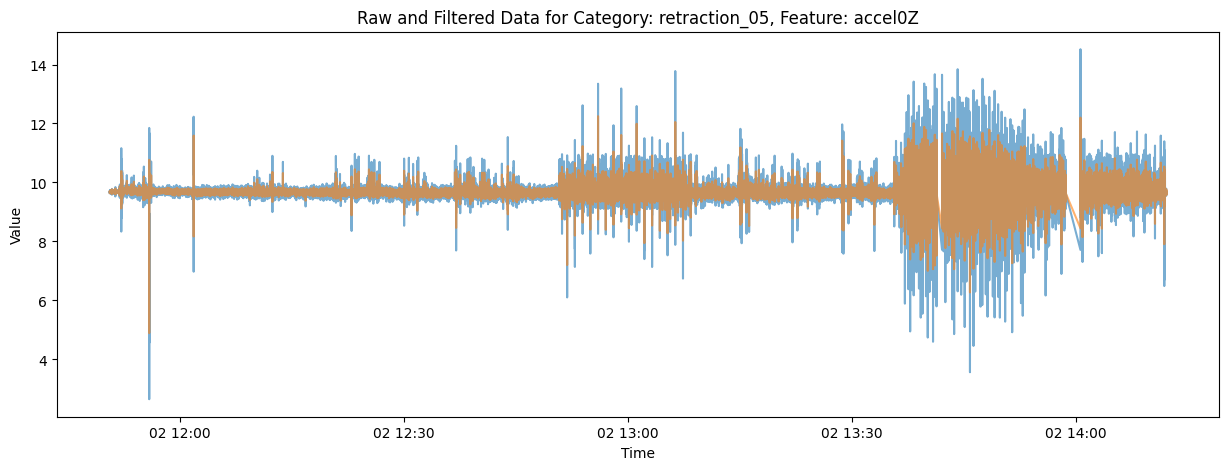

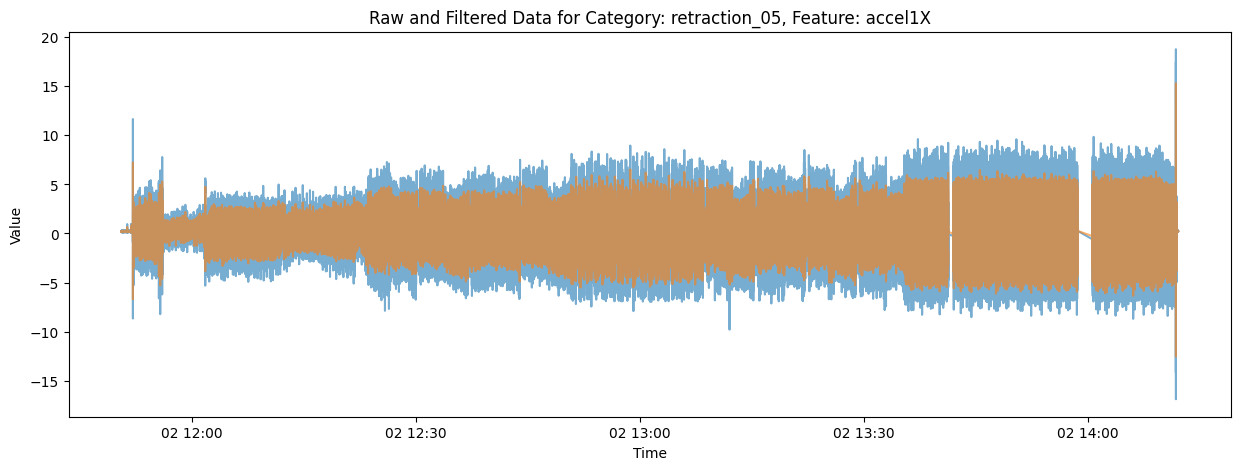

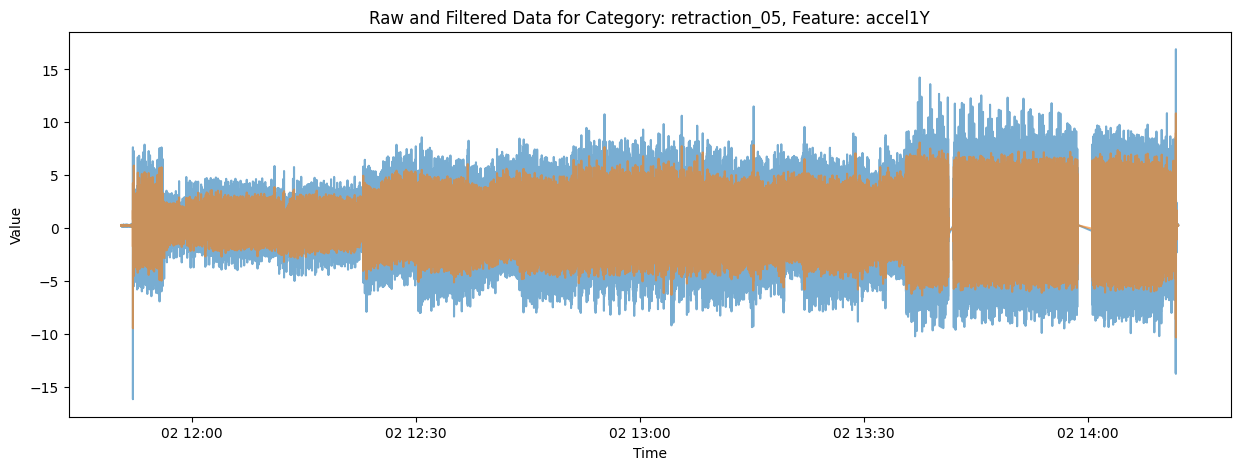

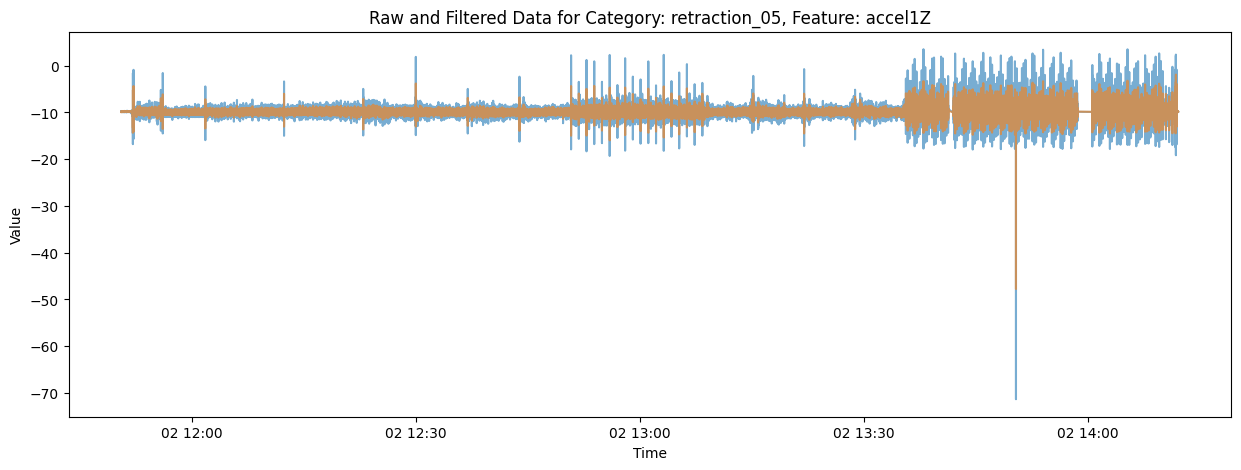

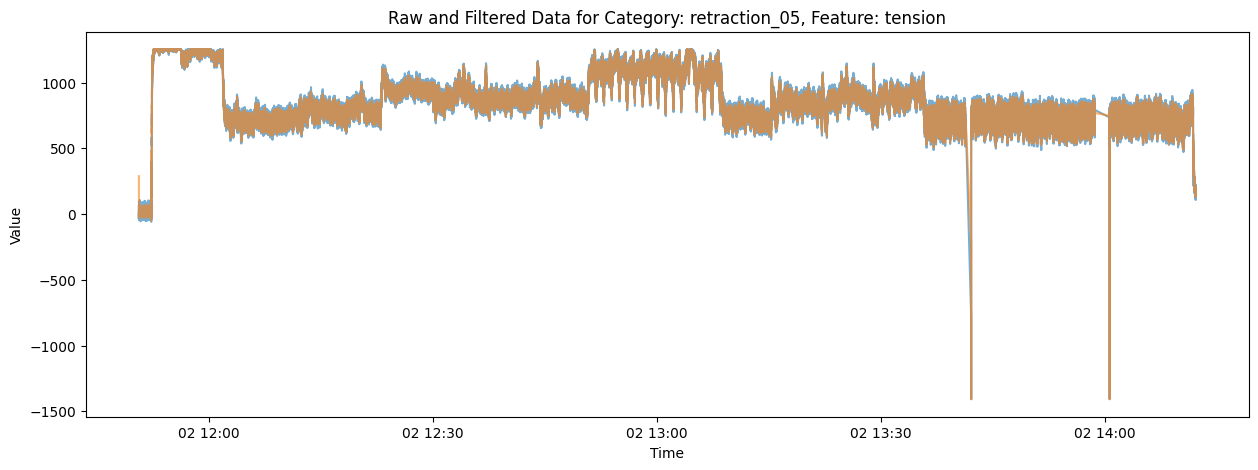

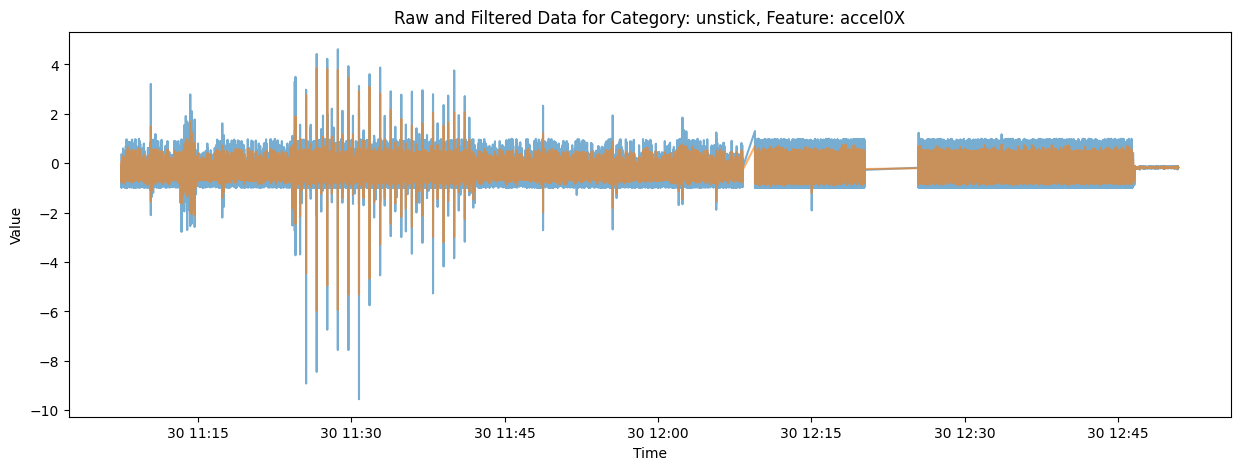

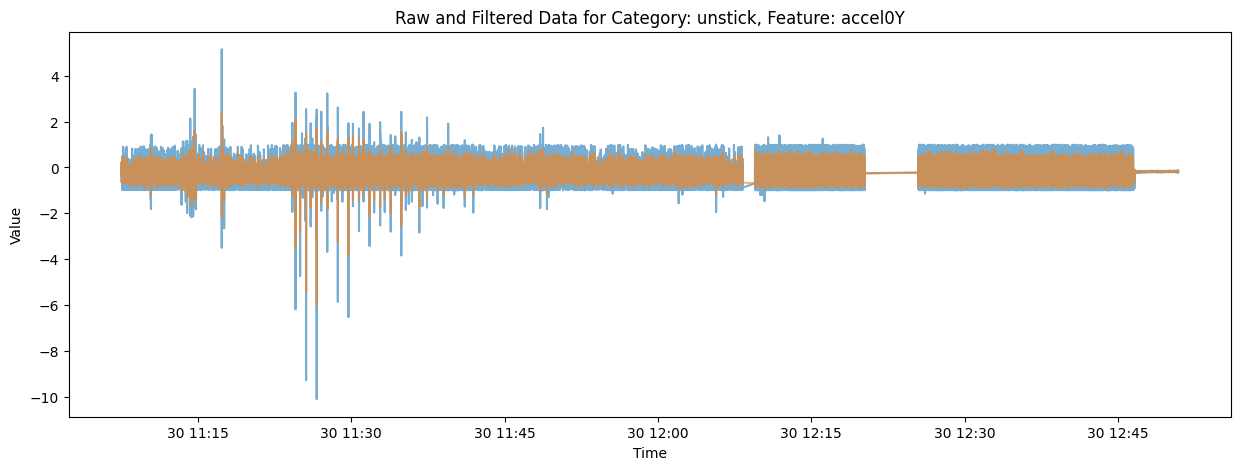

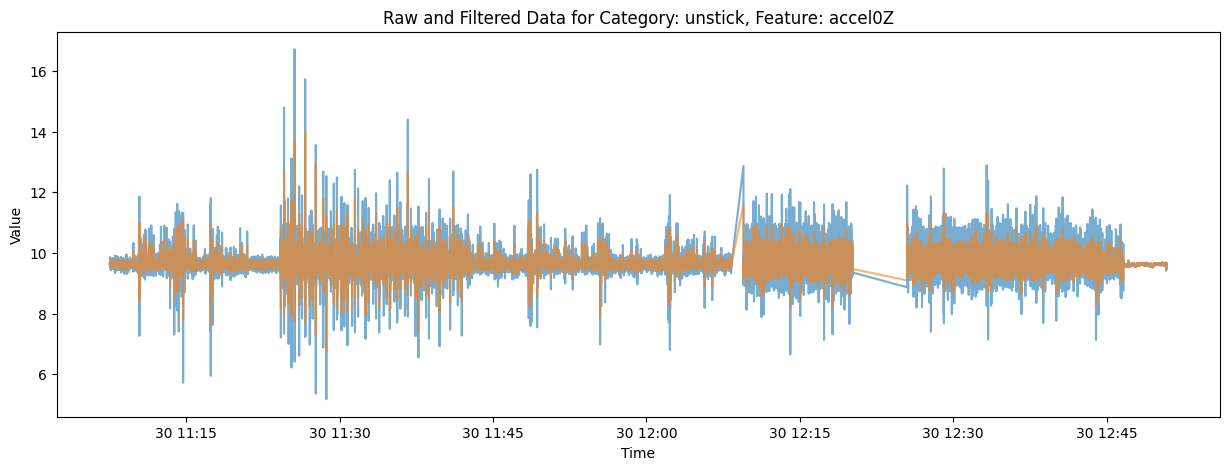

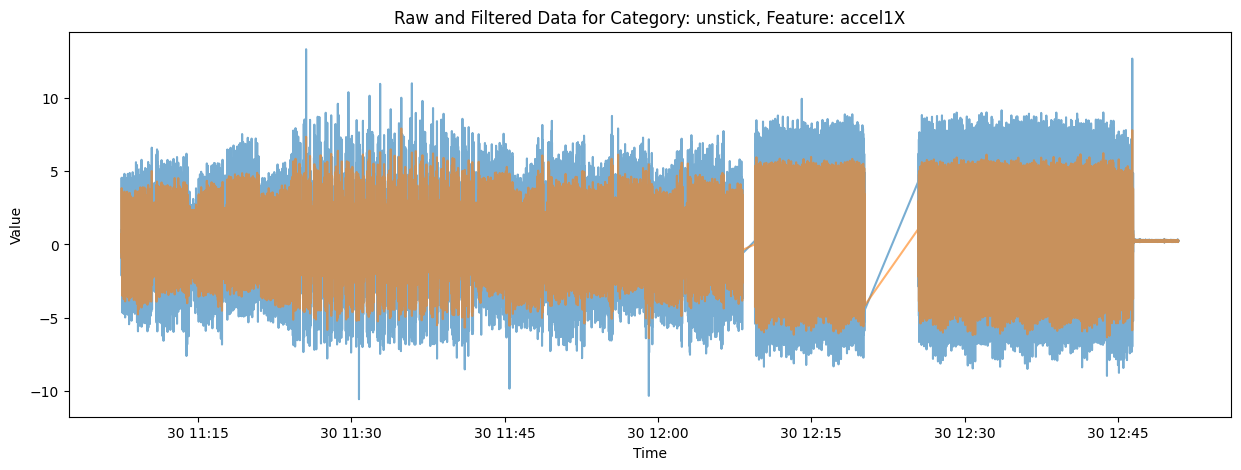

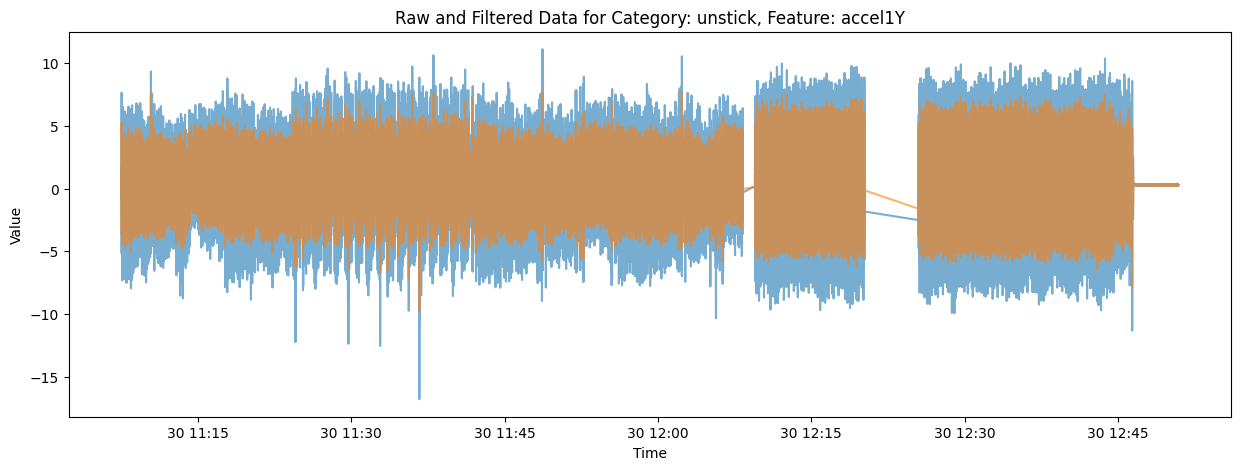

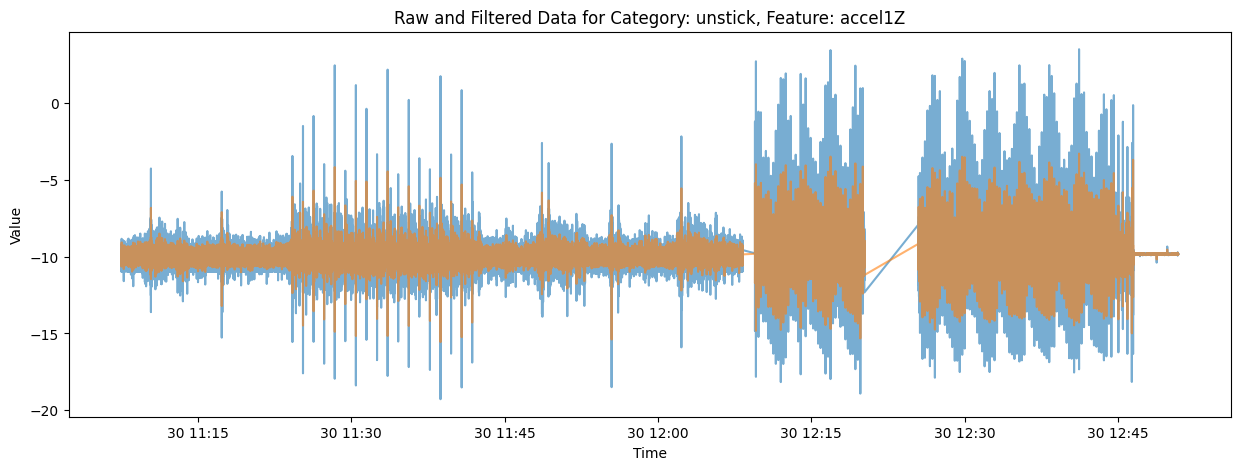

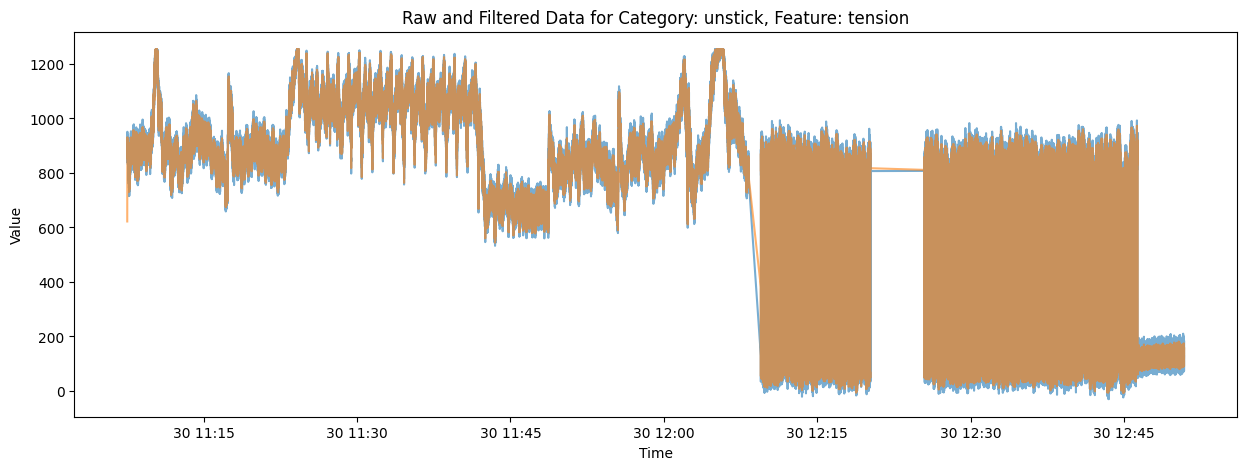

In [9]:
def plot_both_data(df1, df2, features, categories):
    for category in categories:
        category_data = df1[df1['label'] == category]
        category_data2 = df2[df2['label'] == category]
        for feature in features:
            plt.figure(figsize=(15, 5))
            plt.plot(category_data['time'], category_data[feature], label='Raw Data', alpha=0.6)
            plt.plot(category_data2['time'], category_data2[feature], label='Filtered Data', alpha=0.6)
            plt.title(f'Raw and Filtered Data for Category: {category}, Feature: {feature}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()


plot_both_data(Raw_data,all_data_Filtered, features, categories)

In [10]:
# Reshape data into segments
X = all_data[features].values
y = all_data['label'].values

time_steps = 100
samples = len(X) // time_steps
X = X[:samples*time_steps].reshape(samples, time_steps, len(features))

# Encode categorical labels
y = label_encoder.fit_transform(y)
y = y[:samples*time_steps].reshape(samples, time_steps, -1)
y = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the 1D-CNN model
def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(np.unique(y))
model = create_1d_cnn_model(input_shape, num_classes)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

# Save the model
model.save('1d_cnn_model.h5')

C:\Users\M.lotfi\anaconda3\envs\Myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7116 - loss: 0.7814 - val_accuracy: 0.9147 - val_loss: 0.2422
Epoch 2/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8983 - loss: 0.2962 - val_accuracy: 0.9404 - val_loss: 0.1683
Epoch 3/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9287 - loss: 0.2084 - val_accuracy: 0.9451 - val_loss: 0.1664
Epoch 4/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9459 - loss: 0.1608 - val_accuracy: 0.9458 - val_loss: 0.1540
Epoch 5/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9531 - loss: 0.1397 - val_accuracy: 0.9360 - val_loss: 0.2157
Epoch 6/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9574 - loss: 0.1244 - val_accuracy: 0.9530 - val_loss: 0.1581
Epoch 7/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9642 - loss: 0.1035 - val_accuracy: 0.9630 - val_loss: 0.1116
Epoch 8/100
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9700 - loss:

Test Accuracy: 0.964332103729248
Test Loss: 0.10829336941242218


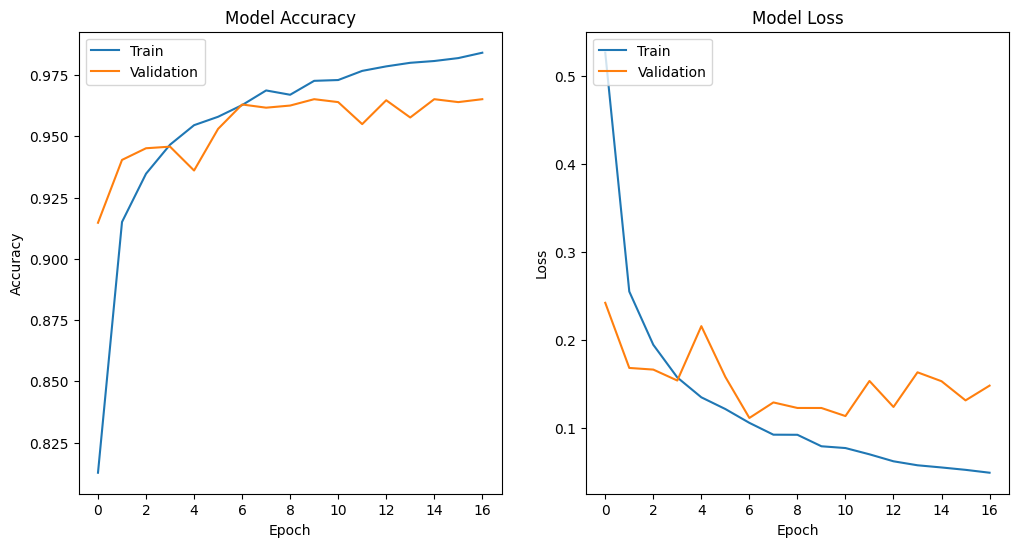

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

  arm_failure       0.95      0.95      0.95      1661
       bowden       0.88      0.88      0.88       674
      plastic       0.87      0.83      0.85       559
       proper       0.99      0.99      0.99      2952
retraction_05       0.98      0.98      0.98      3401
      unstick       0.97      0.97      0.97      2304

     accuracy                           0.96     11551
    macro avg       0.94      0.93      0.94     11551
 weighted avg       0.96      0.96      0.96     11551



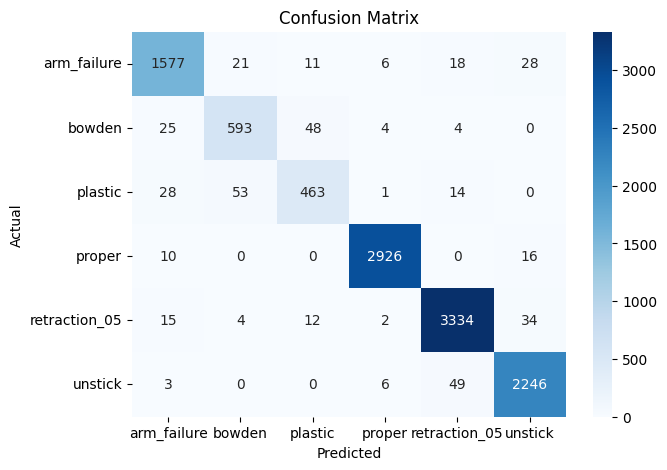

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('1d_cnn_model.h5')

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {accuracy:.2f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print('Classification Report:')
print(report)

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Test with individual samples from the test set
print(len(X_test))

sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_samples = X_test[sample_indices]
y_true_samples = y_test[sample_indices]
y_pred_samples = model.predict(X_samples)
y_pred_classes_samples = np.argmax(y_pred_samples, axis=1)

for i, idx in enumerate(sample_indices):
    print(f'Sample {idx}:')
    print(f'  True Label: {label_encoder.inverse_transform([y_true_samples[i]])[0]}')
    print(f'  Predicted Label: {label_encoder.inverse_transform([y_pred_classes_samples[i]])[0]}')

11551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sample 6944:
  True Label: retraction_05
  Predicted Label: retraction_05
Sample 573:
  True Label: proper
  Predicted Label: proper
Sample 33:
  True Label: retraction_05
  Predicted Label: retraction_05
Sample 1910:
  True Label: unstick
  Predicted Label: unstick
Sample 6791:
  True Label: retraction_05
  Predicted Label: retraction_05


C:\Users\M.lotfi\anaconda3\envs\Myenv\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\M.lotfi\anaconda3\envs\Myenv\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\M.lotfi\anaconda3\envs\Myenv\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\M.lotfi\anaconda3\envs\Myenv\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 0.0973
Test Accuracy: 0.964332103729248
Test Loss: 0.10829336941242218
